How do Genres Affect Movie Gross?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import python libraries to excute code

EDA: Explore 11 Datasets 

In [2]:
bom_df = pd.read_csv('Data/bom.movie_gross.csv')
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
import pandas as pd
movie_budgetdf = pd.read_csv('Data/tn.movie_budgets.csv')
movie_budgetdf.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


I wanted to get the count of the genres in the DataFrame. I called the Data Frame and indexed the column 'genres', and  used the .value_counts() function to get the count of the genres.

In [4]:
# ratings and reviews
#only want movies from 2009-2019
title_basicsdf = pd.read_csv('Data/imdb.title.basics.csv')

title_basicsdf["genres"].value_counts().head()


Documentary     32185
Drama           21486
Comedy           9177
Horror           4372
Comedy,Drama     3519
Name: genres, dtype: int64

I called this Data Frame becuase I want the domestic_gross and foreign_gross columns.

In [5]:
bom_df = pd.read_csv('Data/bom.movie_gross.csv')
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


I want to use this Data Frame, but it has too many NaN values.
The way I can fix this is by replacing all the NaN with the mean of the box office

In [6]:
movie_infodf = pd.read_csv('Data/rt.movie_info.tsv', encoding='Windows-1254', delimiter = '\t')
movie_infodf['box_office'].mean

<bound method Series.mean of 0              NaN
1          600,000
2              NaN
3              NaN
4              NaN
5              NaN
6       41,032,915
7          224,114
8          134,904
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15       1,039,869
16      99,165,609
17             NaN
18      20,518,224
19       1,971,135
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28         312,136
29         201,010
           ...    
1530    72,700,000
1531           NaN
1532           NaN
1533           NaN
1534           NaN
1535           NaN
1536       581,813
1537     1,320,005
1538           NaN
1539           NaN
1540           NaN
1541    25,335,935
1542     1,416,189
1543           NaN
1544           NaN
1545        59,371
1546       794,306
1547           NaN
1548           NaN
1549           NaN
15

In [7]:
movie_infodf.groupby(['genre']),['box_office'].sort(reverse = False)

(<pandas.core.groupby.generic.DataFrameGroupBy object at 0x1a163569e8>, None)

I merged 2 Data Frames together using the .join() method. I did this because I wanted to put all the Data I need from the 2 Data Frames and put it into 1 Data Frame

In [8]:
#merge title basic and title rating because they have t constant

left = title_basicsdf
right = movie_budgetdf
favorite_df = left.join(right)
favorite_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1.0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,3.0,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",4.0,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",5.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In this cell I am filling the NaN and changing the dtype. I am filling the NaN with the mean value, and changing the dtype from a str to an 

In [9]:

movie_infodf['box_office'] = movie_infodf['box_office'].fillna(8261566).astype(str).str.replace(",", "").astype(int)
movie_infodf.groupby(['genre'])['box_office'].value_counts()
movie_infodf['box_office']


0        8261566
1         600000
2        8261566
3        8261566
4        8261566
5        8261566
6       41032915
7         224114
8         134904
9        8261566
10       8261566
11       8261566
12       8261566
13       8261566
14       8261566
15       1039869
16      99165609
17       8261566
18      20518224
19       1971135
20       8261566
21       8261566
22       8261566
23       8261566
24       8261566
25       8261566
26       8261566
27       8261566
28        312136
29        201010
          ...   
1530    72700000
1531     8261566
1532     8261566
1533     8261566
1534     8261566
1535     8261566
1536      581813
1537     1320005
1538     8261566
1539     8261566
1540     8261566
1541    25335935
1542     1416189
1543     8261566
1544     8261566
1545       59371
1546      794306
1547     8261566
1548     8261566
1549     8261566
1550     8261566
1551     8261566
1552     8261566
1553     8261566
1554     8261566
1555    33886034
1556     8261566
1557     82615

This is the new and improved Data Frame. There were very few Nan Values left, so I just dropped them because they would not make that big of a differnce in the Data. Next I use Seaborn to plot my data in a bar plot

TypeError: '<' not supported between instances of 'float' and 'str'

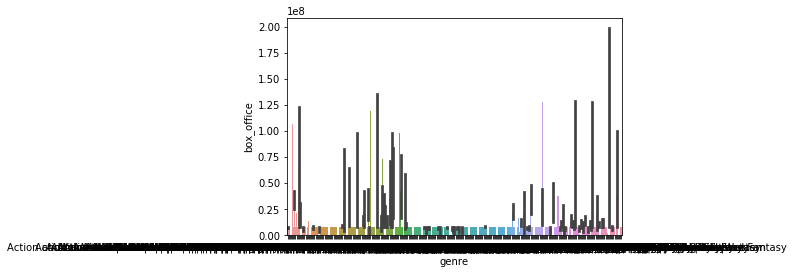

In [10]:
movie_infodf
genre_bodf = pd.DataFrame()
genre_bodf['genre'] = movie_infodf['genre']
genre_bodf['box_office'] = movie_infodf['box_office']
genre_bodf.dropna()
box_officedf = pd.DataFrame()
box_officedf = genre_bodf['box_office'] 
genre_bodf.genre = genre_bodf.genre.astype('category')
sns.barplot(genre_bodf.genre,genre_bodf.box_office)


bin_intervals = [0, 0.25, 0.50, 0.75, 1.0]
bin_labels = ['action','thiller','drama','comedy']
genre_bodf['genre'] = pd.cut(genre_bodf['genre'], bins = bin_intervals, labels = bin_labels)



#df['data'] = pd.DataFrame(x)
#binInterval = [0, 0.6, 0.7, 0.8, 0.9]
#binLabels   = [0, 4, 3, 2, 1]
#df['binned'] = pd.cut(df['data'], bins = binInterval, labels=binLabels)

In this cell I made a new Data Frame that contains the 2 columns I want: Box Office & Genre. This new Data Frame shows the Genre of the Movie and how much money it has generated. There were a few NaN values left, so I dropped them. Then I sorted the genres by how much they made in the box office from most box office revenue to least.

In [23]:
genre_bodf.dropna(inplace=True)


In [24]:
genre_bodf.head(10)

,genre,box_office
0,Action and Adventure|Classics|Drama,8261566
1,Drama|Science Fiction and Fantasy,600000
2,Drama|Musical and Performing Arts,8261566
3,Drama|Mystery and Suspense,8261566
4,Drama|Romance,8261566
5,Drama|Kids and Family,8261566
6,Comedy,41032915
7,Drama,224114
8,Drama,134904
9,Action and Adventure|Mystery and Suspense|Scie...,8261566


I am calling my Data Frame and changing the type to category. Then I am calling the 'genre' collumn to see how many unique values it has using the .unique function. Then I turn my genre column into a list.

In [20]:
genre_bodf.genre = genre_bodf.genre.astype('category')
genre_bodf['genre'].unique()
genres_ = list(genre_bodf['genre'])


After making a list of genres types I made a dictionary that holds the genre as the key and the count as the value.

In [21]:
#list = genres_

#ro_gen = list(genre)
#ro_gen_AA = genre_bodf.loc[genre_bodf['genre']== 'Action and Adventure']

gen_count_dic = {}

# key is the genre
# value is the box office revenue

for genre in genres_:
    gen_count_dic.update({genre:0})

#print(gen_count_dic)
    
    
#genre_bodf2019 = genre_bodf.loc[genre_bodf['genre'] == 'Action and Adventure']


I used a for loop in my dictionary to get the count of how many times a genre come up. I sort the box office values from heighest to lowest using the .sort_values() method. Then I used seaborn to help me visualize my data.

Text(0.5, 1.0, 'Genres With Box Office')

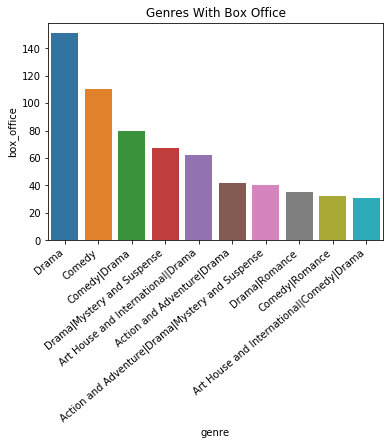

In [22]:
value, counts = np.unique(genres_ ,return_counts = True)
for value, count in zip(value, counts):
    gen_count_dic[value]= count

gen_count_dic

genres_bo2019 = pd.DataFrame(list(gen_count_dic.items()), columns=['genre','box_office'])
genres_bo2019

genres_bo2019 = genres_bo2019.sort_values('box_office', ascending=False).head(10).reset_index()
genres2 = sns.barplot(x= genres_bo2019['genre'],y=genres_bo2019['box_office'])
genres2.set_xticklabels(genres2.get_xticklabels(), rotation=40, ha='right');
plt.title('Genres With Box Office')